<a href="https://colab.research.google.com/github/Mohammadi-Nilofer/ML-assignments/blob/LinearRegression/Linear_Regression_Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression- Insurance

#Problem Statement:

* The cost of medical insurance varies significantly based on individual factors such as age, body mass index (BMI), smoking habits, geographical region, and more.

* predicting medical insurance costs based on individual attributes is crucial for both insurance providers and individuals.


#Objective:

To develop a predictive model that can estimate individual medical insurance costs using a variety of personal attributes as input. This model will help insurance providers and individuals make informed decisions regarding healthcare coverage and financial planning.



#Data Dictionary:

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance


#Importing all necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Loading dataset**

In [ ]:
df=pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**Checking for duplicates in the data**

In [ ]:
df.duplicated().sum()

np.int64(1)

**Observation:**
* There is a duplicate value in the dataset.

**Dropping duplicate value**

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()


np.int64(0)

**Observation: **
* Now there are no duplicate values in the dataset.


**Checking for null values**

In [ ]:
df.isnull().sum().any()

np.False_

**Observation:**

* There are no null values in the dataset.


**Checking the shape of the data**

In [ ]:
print('Number of rows :',df.shape[0])
print('Number of columns :',df.shape[1])


Number of rows : 1337
Number of columns : 7


**Checking Info**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


**Observation:**
We can see that all the columns are in expected data types

#Statistical Analysis

In [ ]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


**Observations:**

* From 'age' column,we can see that the mean and median are approximately same
which means that the data is symmetric. We have people in the range of 18 to 64.
* From 'bmi' column,we can see that the mean and median are approximately same
which means that the data is symmetric.
* From 'children' column,we can see that the mean and median are approximately same which means that the data is symmetric. we have children in the range of 1 to 5.
* From the 'charges column, we can see that mean is significantly greater than the median implying that there are outliers in the right tail.

**Histogram for Numeric columns**

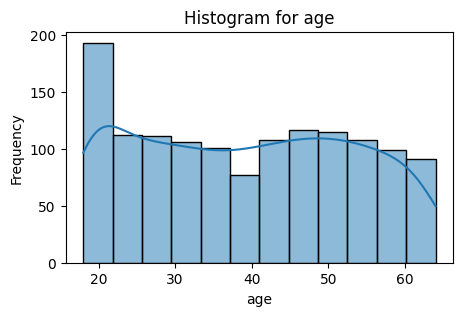

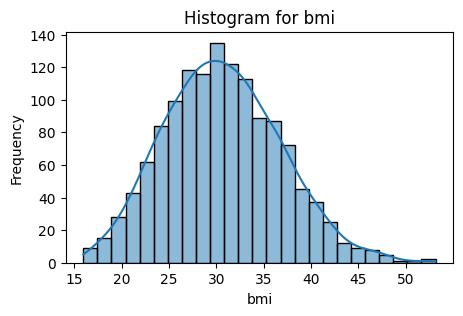

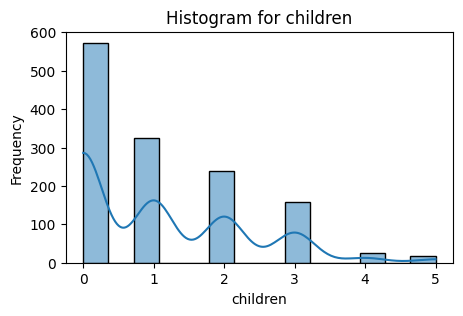

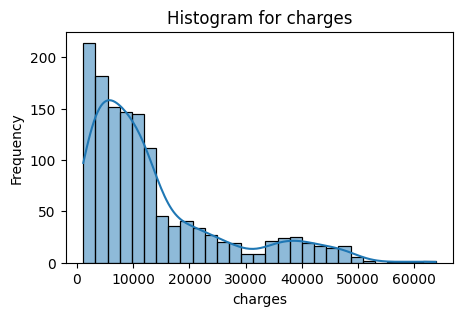

In [ ]:
for col in df.select_dtypes(include=np.number):
  plt.figure(figsize=(5,3))
  sns.histplot(df[col],kde=True)
  plt.title(f'Histogram for {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.show()

**Observations:**

*   From the histogram of 'age' column, we can see that we have maximum people from age 18-22 and the remaining age groups have almost same number of people.
*  From the histogram of 'bmi' column, we can say that the distribution is normal.
*   From the histogram of 'children' column, we can see that as the number of children increases the frequency decreases.
*   From the histogram of 'charges' column, we can see that it follows an exponentially decreasing curve.



**Box plot for numerical columns**

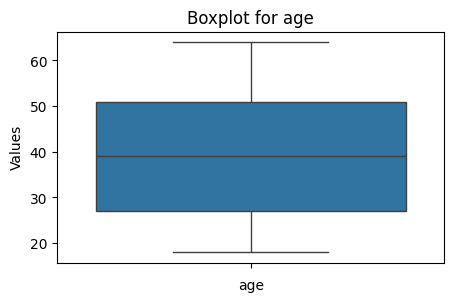

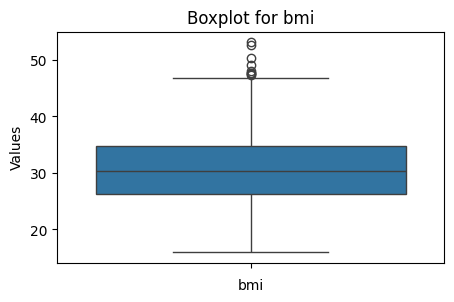

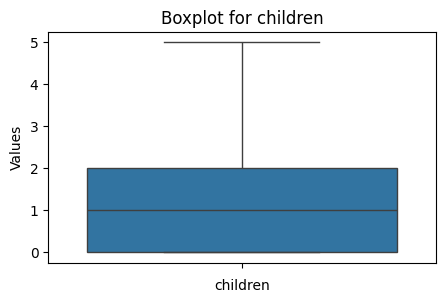

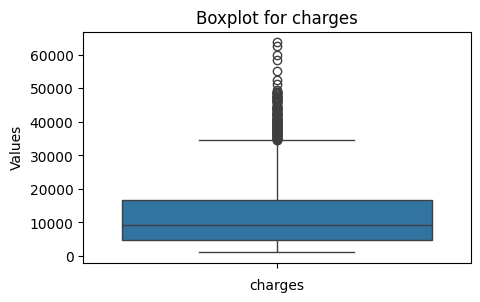

In [ ]:
for col in df.select_dtypes(include=np.number):
  plt.figure(figsize=(5,3))
  sns.boxplot(df[col])
  plt.title(f'Boxplot for {col}')
  plt.xlabel(col)
  plt.ylabel('Values')
  plt.show()

**Observation:**

* From the above boxplots we can see that 'age' and 'children' columns do not have outliers.
* From the above plots , we can see that the 'bmi' and 'charges' columns have outliers in the right tail.

**Pie Chart for Sex column**

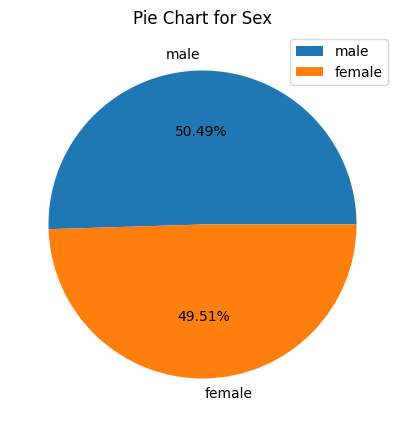

In [ ]:
counts=df['sex'].value_counts()

#Piechart
plt.figure(figsize=(5,5))
plt.pie(counts,labels=counts.index,autopct='%.2f%%')
plt.title('Pie Chart for Sex')
plt.legend()
plt.show()

**Observations:**

We have almost same number of males and females in the dataset.

**Countplots for Object columns**

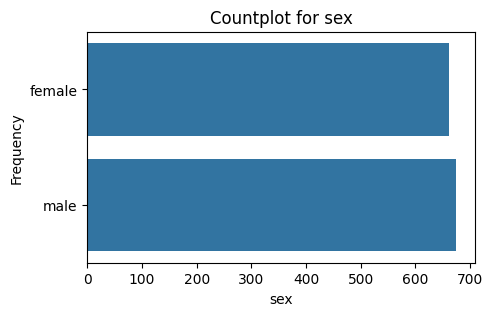

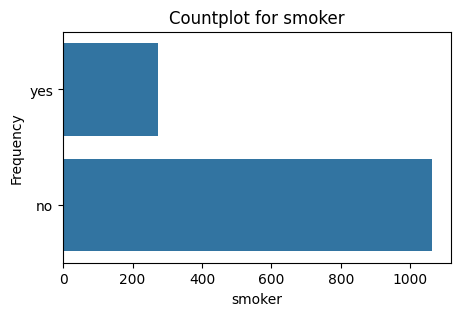

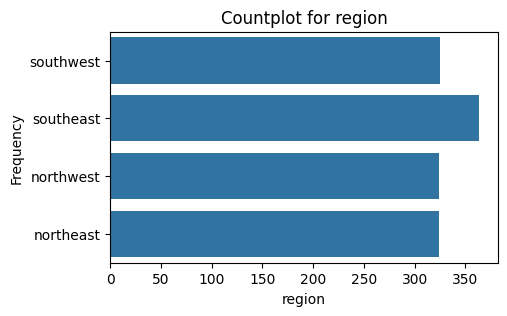

In [ ]:
for col in df.select_dtypes(exclude=np.number):
  plt.figure(figsize=(5,3))
  sns.countplot(df[col])
  plt.title(f'Countplot for {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.show()

**Observations:**

* From the 'sex' column, we can conclude that there are almost equal number of males and females.
* From the 'smoker' column we can conclude that we have significantly higher number of non-smokers than smokers.
* From the 'region' column, we can see that we have slightly number of customers from southeast rregion, but the other regions have almost equal number of customers.

**Scatterplot for bmi and charges**

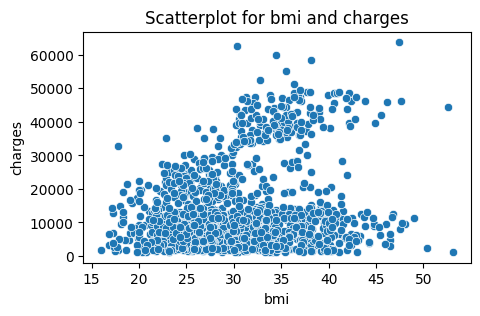

In [ ]:
plt.figure(figsize=(5,3))
sns.scatterplot(x= df['bmi'],y= df['charges'])
plt.title('Scatterplot for bmi and charges')
plt.xlabel('bmi')
plt.ylabel('charges')
plt.show()

**Observations:**
'bmi' is not correlated with 'charges'.

**Scatterplot for 'age' and 'charges'**

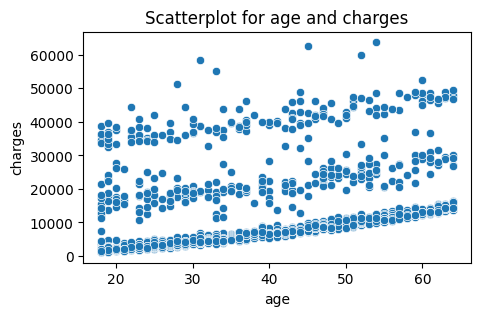

In [ ]:
plt.figure(figsize=(5,3))
sns.scatterplot(x= df['age'],y= df['charges'])
plt.title('Scatterplot for age and charges')
plt.xlabel('age')
plt.ylabel('charges')
plt.show()

**Observations:**
'Age' is not correlated with 'charges'.

In [ ]:
#Getting the list of columns
print('Columns:',df.columns)


Columns: Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


**Dealing with 'Binary' categorical values**

In [ ]:
df.loc[df['sex']=='female','sex']=0
df.loc[df['sex']=='male','sex']=1
df.loc[df['smoker']=='no','smoker']=0
df.loc[df['smoker']=='yes','smoker']=1
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


**Note:**
We can also use map(), replace() functions to implement the above activity.

**Performing One-Hot Encoding for 'region' column in the dataframe.**

In [ ]:
df=pd.get_dummies(df,columns=['region'])
df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,False,True
1,18,1,33.770,1,0,1725.55230,False,False,True,False
2,28,1,33.000,3,0,4449.46200,False,False,True,False
3,33,1,22.705,0,0,21984.47061,False,True,False,False
4,32,1,28.880,0,0,3866.85520,False,True,False,False


In [ ]:
#Replacing False with 0 and True with 1
df.replace({False:0,True:1},inplace=True)
df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [ ]:
#Checking the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1337 non-null   int64  
 1   sex               1337 non-null   int64  
 2   bmi               1337 non-null   float64
 3   children          1337 non-null   int64  
 4   smoker            1337 non-null   int64  
 5   charges           1337 non-null   float64
 6   region_northeast  1337 non-null   int64  
 7   region_northwest  1337 non-null   int64  
 8   region_southeast  1337 non-null   int64  
 9   region_southwest  1337 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 147.2 KB


**Correlation Analysis(Pearson's correlation coefficient)**


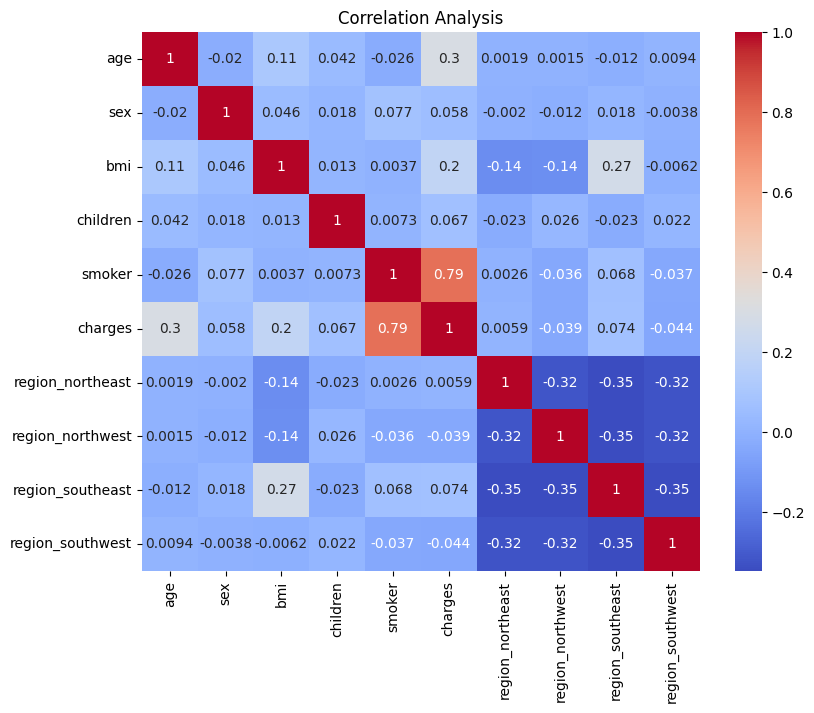

In [ ]:
plt.figure(figsize=(9,7))
sns.heatmap(df.corr(), annot=True,cmap='coolwarm')
plt.title('Correlation Analysis')
plt.show()


**Observations:**

* 'Charges' are showing strong positive corelation with 'smoker'.
* 'Charges' are showing weak positive correlation with 'age' and 'bmi'.

#Model Building

** we are creating 2 models.**
1. Simple linear regression -> charges ~ smoker

2. Multiple linear regression -> charges ~ age+ bmi + smoker

#Simple Linear Regression

In [ ]:
#Seperating the input and output features

X=df[['smoker']]
y=df['charges']


#Performing trainn test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
#Creating the model
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
#Taking predictions from the trained model on training and testing data
y_train_pred=model.predict(X_train)
y_test_pred=model.predict(X_test)

**Model Evaluation**

In [ ]:
from sklearn.metrics import r2_score

print('Training R2_score:', np.round(r2_score(y_train,y_train_pred),2))
print('Testing R2_score:' ,np.round(r2_score(y_test,y_test_pred),2))

Training R2_score: 0.6
Testing R2_score: 0.64


**Observations:**
The slightly higher testing R-squared suggests good generalization to new data. While smoking is a strong predictor, there's potential for improvement by including other relevant factors. This model provides valuable insights for insurance pricing and individual decision-making.

#Multiple Linear Regression

In [ ]:
#Seperating the input and output features

X=df[['age','bmi','smoker']]
y=df['charges']


#Performing train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

In [ ]:
#Creating the model
from sklearn.linear_model import LinearRegression

#Initializing the model
model=LinearRegression()

#Fitting the model
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
#Taking predictions from the trained model on training and testing data
y_train_pred=model.predict(X_train)
y_test_pred=model.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score

print('Training R2_score:', np.round(r2_score(y_train,y_train_pred),2))
print('Testing R2_score:' ,np.round(r2_score(y_test,y_test_pred),2))

Training R2_score: 0.75
Testing R2_score: 0.72


**Observations:**

* Multiple Linear Regression has worked better than simple Linear Regression model

* The difference between training and testing performance is within 5% (which is acceptable)
* The performance is okayish on training and testing data.

Conclusion:

The model demonstrates good predictive power, explaining around 72-75% of the variation in insurance charges. It generalizes well to new data and offers valuable insights for insurance pricing using 'age', 'bmi', and 'smoker' as key predictors. There's still potential for further model improvement.

**Suggestions:**

To further increase the performance of the model following can be considered

* Clip the outliers (bmi and charges)
* Try and apply a few transformations(log,exp, square,cube,etc).
* Feature engineering(Take help with subject matter experts).